# Multi-output facial attribute classification.

CelebFaces Attributes Dataset (CelebA) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations. The images in this dataset cover large pose variations and background clutter. CelebA has large diversities, large quantities, and rich annotations, including

10,177 number of identities, 202,599 number of face images, and 5 landmark locations, 40 binary attributes annotations per image.

The aim of the project to do binary classification for three facial attributes that is:
<ul>
<li>Gender 0 for male and 1 for not male
<li>Smiling 0 for smiling and 1 for not smiling
<li>Young 0 for young and 1 for not young
</ul>

Successful conclusion would be achieving predictions that match actual attribute.



## Sections of the notebook
<ol>
<li>Importing Necessary libraries
<li>Data Exploration
<li>Data Distribution
<li>Batch Size, Model handle and Image size
<li>Utility Funcions
<li>Splitting the Dataset
<li>Visualization of images
<li>Normalization and data augmentation
<li>Building the model
<li>Training the model
<li>Visualization - Training scores and Validation scores
<li> Validating the model

### Importing necessary libraries 

In [25]:
#Import standard Deep Learning libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pylab as plt
import seaborn as sns

#Checking tensorflow version and ensuring it is above 2.5.X to support Python 3.9
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)


TF version: 2.10.0
Hub version: 0.12.0


In [3]:
#set PATH variable to location of data set in local directory/storage.
PATH = "D:/DL Project/"

ATTR_PATH = PATH + "list_attr_celeba.csv"  
PARTITION_PATH = PATH + "list_eval_partition.csv"
IMAGES_PATH = PATH +"img_align_celeba/img_align_celeba/"

### DATA EXPLORATION

In [4]:
# Inputing CelebA dataset into DataFrame object
df = pd.merge(pd.read_csv(PARTITION_PATH), pd.read_csv(ATTR_PATH), on="image_id")
df.head()

,image_id,partition,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,-1,1,1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,0,-1,-1,-1,1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,0,-1,-1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,0,-1,-1,1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,0,-1,1,1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [23]:
df.shape

(202599, 42)

There are total 40 image features, with image_id and parition as the other columns with 202599 unique data points

In [16]:
df.describe()

,partition,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
count,202599.000000,202599.000000,202599.000000,202599.00000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,...,202599.000000,202599.000000,202599.000000,202599.000000,202599.00000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000
mean,0.295120,-0.777728,-0.466039,0.02501,-0.590857,-0.955113,-0.696849,-0.518408,-0.530935,-0.521498,...,-0.886979,-0.035839,-0.583196,-0.360866,-0.62215,-0.903079,-0.055129,-0.754066,-0.854570,0.547234
std,0.636463,0.628602,0.884766,0.99969,0.806778,0.296241,0.717219,0.855135,0.847414,0.853255,...,0.461811,0.999360,0.812333,0.932620,0.78290,0.429475,0.998482,0.656800,0.519338,0.836982
min,0.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
50%,0.000000,-1.000000,-1.000000,1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
75%,0.000000,-1.000000,1.000000,1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,1.000000,-1.000000,1.000000,-1.00000,-1.000000,1.000000,-1.000000,-1.000000,1.000000
max,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Listing out all 40 features. But we will limit features to limit scope of the problem

In [17]:
df.columns

Index(['image_id', 'partition', '5_o_Clock_Shadow', 'Arched_Eyebrows',
       'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips',
       'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair',
       'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee',
       'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male',
       'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [18]:
df.isnull().sum()

image_id               0
partition              0
5_o_Clock_Shadow       0
Arched_Eyebrows        0
Attractive             0
Bags_Under_Eyes        0
Bald                   0
Bangs                  0
Big_Lips               0
Big_Nose               0
Black_Hair             0
Blond_Hair             0
Blurry                 0
Brown_Hair             0
Bushy_Eyebrows         0
Chubby                 0
Double_Chin            0
Eyeglasses             0
Goatee                 0
Gray_Hair              0
Heavy_Makeup           0
High_Cheekbones        0
Male                   0
Mouth_Slightly_Open    0
Mustache               0
Narrow_Eyes            0
No_Beard               0
Oval_Face              0
Pale_Skin              0
Pointy_Nose            0
Receding_Hairline      0
Rosy_Cheeks            0
Sideburns              0
Smiling                0
Straight_Hair          0
Wavy_Hair              0
Wearing_Earrings       0
Wearing_Hat            0
Wearing_Lipstick       0
Wearing_Necklace       0


We can notice that all features have non zeros entries

## Data Distribution

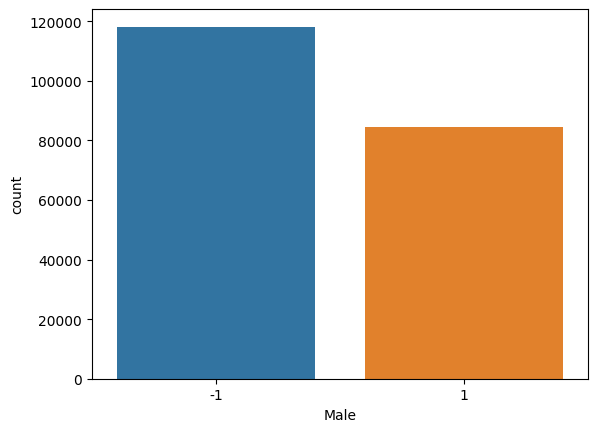

In [26]:
sns.countplot(data = df, x = "Male")
plt.show()

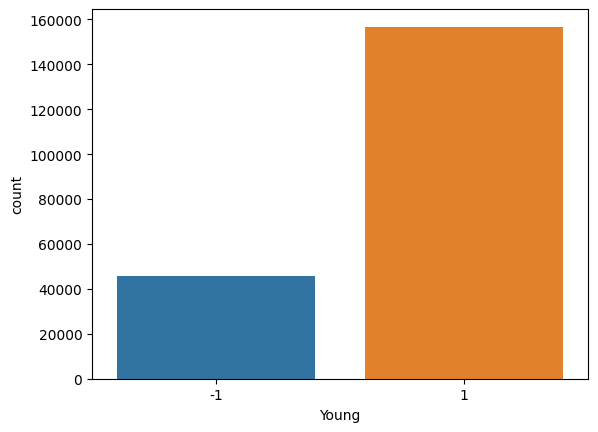

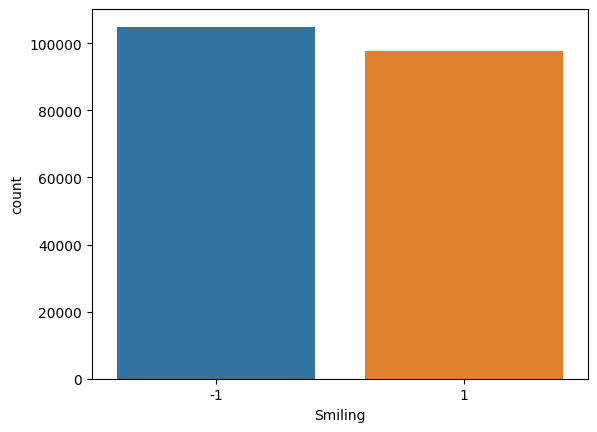

In [28]:
sns.countplot(data = df, x = "Young")
plt.show()

sns.countplot(data = df, x = "Smiling")
plt.show()

There are some inconsistencies in the data, for example: we can observe that there are more young samples when come to not young samples, there are more not male samples when compare to male samples and so on.

### Batch Size, Model handle and Image size

Batch size is the number of samples that will be passed through to the network at one time.

Model Handle is the common terminology used to denote pre-trained weights in tensorflow hub environment and takes input string to load pre-trained weights.

Image size is usually defined as the size of vector that input network layers expect

In [5]:
#Adjust batch size accordingly to computational resources available, we have choosen 128 according to our computational resources
BATCH_SIZE = 128
#MODEL_HANDLE is the variable in which we are saving pretrained weights from Efficientnet_v2 used to extract feature vector
MODEL_HANDLE = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2" 

#Image size of 224,224,3 is the input required for Efficientnet, and Efficientnet V2 expects a feature vector for size 224,224
IMAGE_SIZE = (224, 224)

### Utility functions to preprocess, load and preprocess images and building dataset with relevant features only

This section of code builds utility functions that help build dataset from the original dataframe and select 3 features out of the total 40 features. 

In [6]:
# Preprocess_image is used to resize all images into 224 X 224 pixels
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, IMAGE_SIZE)
    return image

# load_and_preprocess 
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

# load_and_preprocess_from_path_label function 
def load_and_preprocess_from_path_label(path, male, smiling, young):
    images = load_and_preprocess_image(path)
    return images, male, smiling, young
'''
build_data_from_df utilizes the above funcions to build dataset from the original Dataframe of CelebA and remove attributes-
that are out of scope of defined problem statement.
'''
def build_dataset_from_df(df):
    ds = tf.data.Dataset.from_tensor_slices((
        [IMAGES_PATH + image_id for image_id in df["image_id"]],
        list(df["Male"].replace(-1, 0)),
        list(df["Smiling"].replace(-1, 0)),
        list(df["Young"].replace(-1, 0))
    ))
    ds = ds.map(load_and_preprocess_from_path_label)
    ds = ds.shuffle(buffer_size=1000)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds


### Splitting the dataset

Spliting the dataset into training and validation set based on data from "partition" column.<br>
0 --> Training data
1 --> Validation data
2 --> Testing data

In [8]:
# train_ds and val_ds are the new Dataframe objects containing attributes- young, smiling and male

train_df = df.loc[df["partition"] == 0]
train_ds = build_dataset_from_df(train_df)

val_df = df.loc[df["partition"] == 1]
val_ds = build_dataset_from_df(val_df)

In [9]:
# Printing size of the labels with attribute
for image, male, smiling, young in train_ds.take(1):
    print("Image dimension: ", image.numpy().shape)
    print("Shape of Gender feature vector: ", male.shape)
    print("Shape of Smiling feature vector:", smiling.shape)
    print("Shape of Young vector", young.shape)

Image dimension:  (128, 224, 224, 3)
Shape of Gender feature vector:  (128,)
Shape of Smiling feature vector: (128,)
Shape of Young vector (128,)


### Visualization of images with their actual facial attributes
Plotting images with their corresponding features

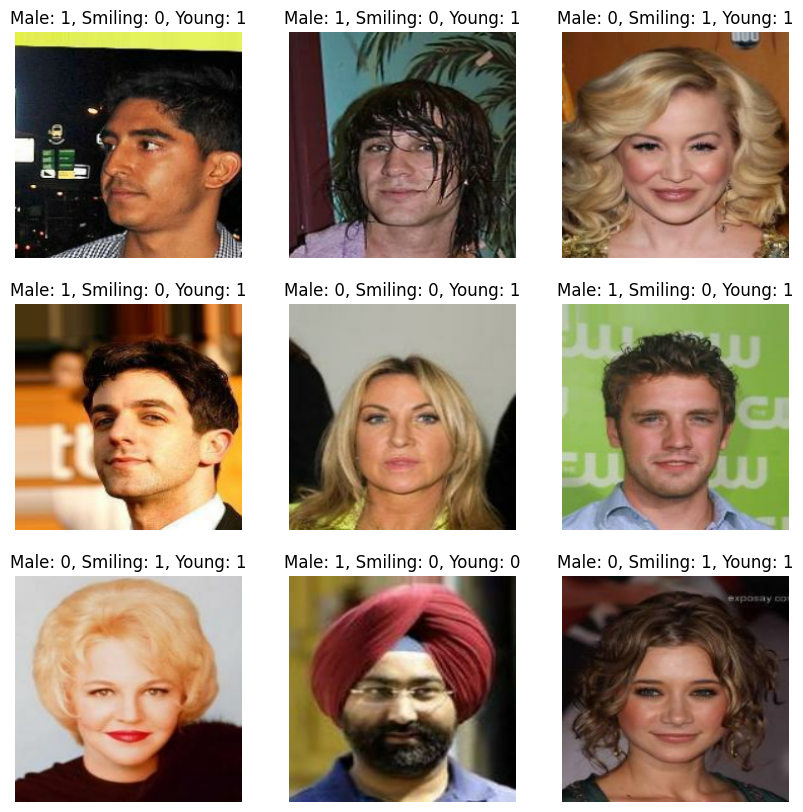

In [11]:
image, male, smiling, young = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i].numpy().astype("uint8"))
    s = f"Male: {male[i].numpy()}, Smiling: {smiling[i].numpy()}, Young: {young[i].numpy()}"
    plt.title(s)
    plt.axis("off")

### Normalization and data augmentation layers to remove inconsistencies in data set

To address the problem of data inconsistency observed in data visualization section, we have to use image segmentation to produce variations of images that are treated as new images so as to increase the number of labeled data the model sees.

But to computational limitations that we have choosen to not use image/data augmentation but it is recommended to achieve higher accuracies

In [12]:
normalization_layer = tf.keras.layers.Rescaling(1. / 255)
preprocessing_model = tf.keras.Sequential([normalization_layer])

#Disabling data augmentation due to computational restrictions 
#
do_data_augmentation = False

if do_data_augmentation:
    preprocessing_model.add(tf.keras.layers.RandomRotation(0.2))
    preprocessing_model.add(tf.keras.layers.RandomTranslation(0, 0.2))
    preprocessing_model.add(tf.keras.layers.RandomTranslation(0.2, 0))
    preprocessing_model.add(tf.keras.layers.RandomZoom(0.2, 0.2))
    preprocessing_model.add(tf.keras.layers.RandomFlip(mode="horizontal"))
    
train_ds = train_ds.map(lambda images, male, smiling, young:
                        (preprocessing_model(images), (male, smiling, young)))

val_ds = val_ds.map(lambda images, male, smiling, young:
                    (normalization_layer(images), (male, smiling, young)))

## Building the Model

In [13]:
#Fine tuning set to false due to computational restrictions as code was run on local machine
do_fine_tuning = False
input = tf.keras.Input(shape=IMAGE_SIZE + (3,))
x = hub.KerasLayer(MODEL_HANDLE, trainable=do_fine_tuning)(input)
x = tf.keras.layers.Dropout(rate=0.2)(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)

#Out_male, out_smiling, and out_young 
out_male = tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation="sigmoid", name='male')(x)
out_smiling = tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation="sigmoid", name='smiling')(x)
out_young = tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation="sigmoid", name='young')(x)

model = tf.keras.Model( inputs = input, outputs = [out_male, out_smiling, out_young])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 keras_layer (KerasLayer)       (None, 1280)         5919312     ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 1280)         0           ['keras_layer[0][0]']            
                                                                                                  
 dense (Dense)                  (None, 128)          163968      ['dropout[0][0]']            

#### Model summary:
As we can observe, there are 6.08 million parameters with total trainable parameters being 164,355.
Total non-trainable parameters are 5.9 million.

In [14]:
# Using Binary Crossentropy because we aim to do binary classification of each of the defined 
model.compile(
    loss = {
        "male": tf.keras.losses.BinaryCrossentropy(),
        "smiling": tf.keras.losses.BinaryCrossentropy(),
        "young": tf.keras.losses.BinaryCrossentropy()
    },
    
# Using accuracy metrics
    metrics = {
        "male": 'accuracy',
        "smiling": 'accuracy',
        "young": 'accuracy'
    },
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
)

### Training the model

In [13]:
steps_per_epoch = len(train_df) // BATCH_SIZE
validation_steps = len(val_df) // BATCH_SIZE
hist = model.fit(
    train_ds,
    epochs=3, steps_per_epoch=steps_per_epoch,
    validation_data=val_ds,
    validation_steps=validation_steps).history

Epoch 1/3
1271/1271 [==============================] - 3847s 3s/step - loss: 0.8622 - male_loss: 0.1247 - smiling_loss: 0.4109 - young_loss: 0.3261 - male_accuracy: 0.9520 - smiling_accuracy: 0.8099 - young_accuracy: 0.8640 - val_loss: 0.7642 - val_male_loss: 0.0855 - val_smiling_loss: 0.3507 - val_young_loss: 0.3275 - val_male_accuracy: 0.9666 - val_smiling_accuracy: 0.8498 - val_young_accuracy: 0.8594
Epoch 2/3
1271/1271 [==============================] - 3746s 3s/step - loss: 0.7929 - male_loss: 0.1054 - smiling_loss: 0.3796 - young_loss: 0.3073 - male_accuracy: 0.9593 - smiling_accuracy: 0.8276 - young_accuracy: 0.8724 - val_loss: 0.7478 - val_male_loss: 0.0798 - val_smiling_loss: 0.3391 - val_young_loss: 0.3285 - val_male_accuracy: 0.9695 - val_smiling_accuracy: 0.8509 - val_young_accuracy: 0.8605
Epoch 3/3
1271/1271 [==============================] - 3747s 3s/step - loss: 0.7708 - male_loss: 0.0989 - smiling_loss: 0.3695 - young_loss: 0.3019 - male_accuracy: 0.9621 - smiling_accu

In [23]:
hist

{'loss': [0.8621907830238342, 0.7928568124771118, 0.7707589864730835],
 'male_loss': [0.12472067028284073, 0.10539133846759796, 0.09892390668392181],
 'smiling_loss': [0.41085001826286316,
  0.37964698672294617,
  0.3695099353790283],
 'young_loss': [0.3260566294193268, 0.3073425889015198, 0.3018992841243744],
 'male_accuracy': [0.9520493149757385, 0.9592840075492859, 0.9620869159698486],
 'smiling_accuracy': [0.8098999261856079,
  0.8276086449623108,
  0.8331591486930847],
 'young_accuracy': [0.8639727830886841, 0.872393786907196, 0.8746373653411865],
 'val_loss': [0.7642360329627991, 0.7478486895561218, 0.7404118180274963],
 'val_male_loss': [0.08553789556026459,
  0.07982660830020905,
  0.07828792184591293],
 'val_smiling_loss': [0.35069721937179565,
  0.3391178250312805,
  0.3315522372722626],
 'val_young_loss': [0.3274909555912018,
  0.32845795154571533,
  0.33016806840896606],
 'val_male_accuracy': [0.9665826559066772,
  0.969506025314331,
  0.9682963490486145],
 'val_smiling_acc

### Visualization of Training and Validation graphs

Plotting training and validation accuracy scores

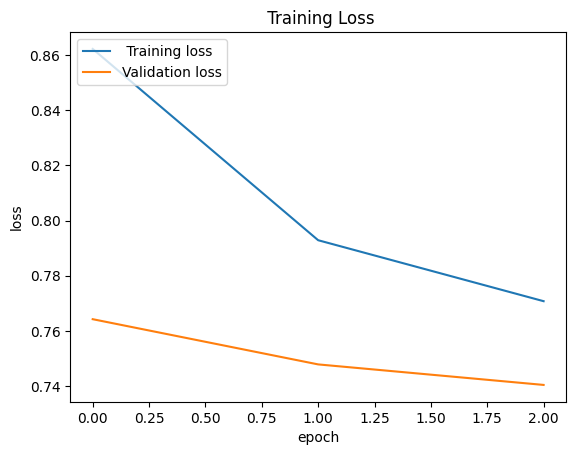

In [26]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title(' Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend([' Training loss', 'Validation loss'], loc='upper left')
plt.show()

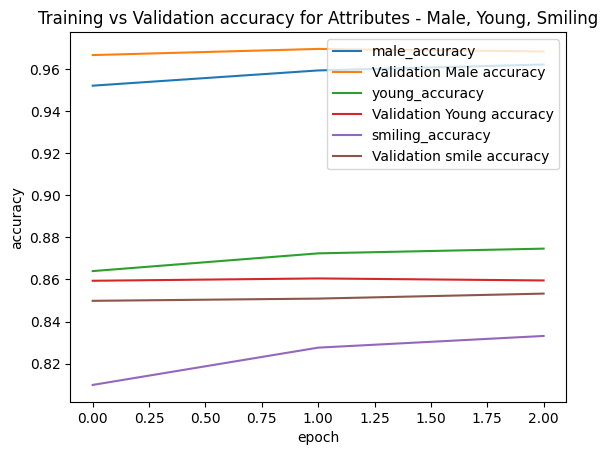

In [28]:
# Using Matplotlib to plot accuracy values from hist dictionary with corresponding epochs
plt.plot(hist['male_accuracy'])
plt.plot(hist['val_male_accuracy'])
plt.plot(hist['young_accuracy'])
plt.plot(hist['val_young_accuracy'])
plt.plot(hist['smiling_accuracy'])
plt.plot(hist['val_smiling_accuracy'])
plt.plot

plt.title('Training vs Validation accuracy for Attributes - Male, Young, Smiling')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['male_accuracy', 'Validation Male accuracy', 'young_accuracy', 'Validation Young accuracy','smiling_accuracy', 'Validation smile accuracy'], loc='upper right')
plt.show()

### Testing

Taking a random image from constructed dataset and predicting probability of person in the picture being Male, Young and Smiling and then doing binary classification to give a 0 or 1 to indicate presence of attribute.

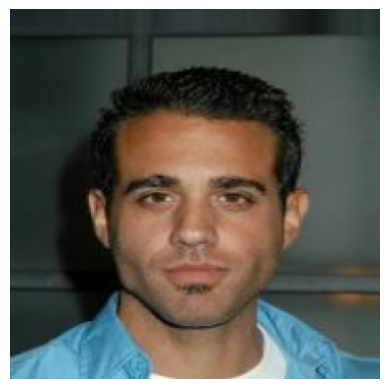

1/1 [==============================] - 0s 47ms/step
Male: actual 1, predicted 1 (0.9998)
Smiling: actual 0, predicted 0 (0.1421)
Young: actual 1, predicted 1 (0.9257)


In [30]:
x, y = next(iter(val_ds))
image = x[0, :, :, :]
plt.imshow(image)
plt.axis('off')
plt.show()

prediction_scores = model.predict(np.expand_dims(image, axis=0))
for i, label in enumerate(["Male", "Smiling", "Young"]):
    pred = prediction_scores[i][0][0]
    print(f"{label}: actual {y[i][0]}, predicted {1 if pred > 0.5 else 0} ({format(pred, '.4f')})")

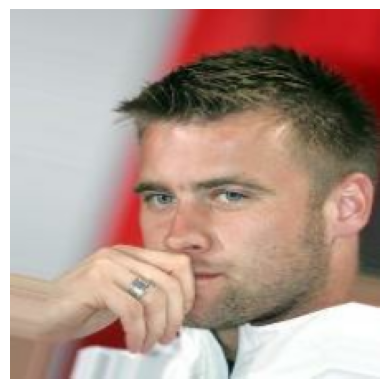

1/1 [==============================] - 0s 49ms/step
Male: actual 1, predicted 1 (0.9970)
Smiling: actual 0, predicted 0 (0.0738)
Young: actual 1, predicted 1 (0.8993)


In [31]:
x, y = next(iter(val_ds))
image = x[0, :, :, :]
plt.imshow(image)
plt.axis('off')
plt.show()

prediction_scores = model.predict(np.expand_dims(image, axis=0))
for i, label in enumerate(["Male", "Smiling", "Young"]):
    pred = prediction_scores[i][0][0]
    print(f"{label}: actual {y[i][0]}, predicted {1 if pred > 0.5 else 0} ({format(pred, '.4f')})")

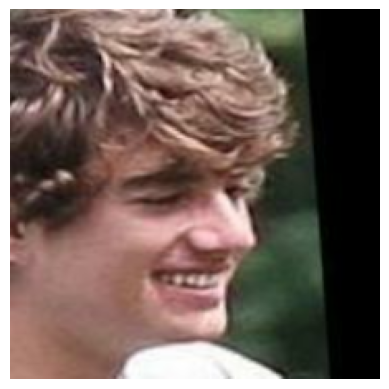

1/1 [==============================] - 0s 51ms/step
Male: actual 1, predicted 1 (0.7063)
Smiling: actual 1, predicted 0 (0.1964)
Young: actual 1, predicted 1 (0.7718)


In [32]:
x, y = next(iter(val_ds))
image = x[0, :, :, :]
plt.imshow(image)
plt.axis('off')
plt.show()

prediction_scores = model.predict(np.expand_dims(image, axis=0))
for i, label in enumerate(["Male", "Smiling", "Young"]):
    pred = prediction_scores[i][0][0]
    print(f"{label}: actual {y[i][0]}, predicted {1 if pred > 0.5 else 0} ({format(pred, '.4f')})")

## References:
Used for code and model architecture:<br>
https://www.kaggle.com/code/cbrincoveanu/transfer-learning-and-multi-output-tutorial<br>
https://www.kaggle.com/code/dpamgautam/face-recognition-gender-detection-inceptionv3<br>
https://www.kaggle.com/code/ky2019/starter-celebfaces-attributes-celeba-b5421ae1-e<br>
https://www.kaggle.com/code/bulentorun/pytorchdeepcnn-classifying-images-with-deep-cnn<br>
https://tfhub.dev/google/collections/efficientnet/1<br>
https://datasets.activeloop.ai/docs/ml/datasets/celeba-dataset/<br>
https://towardsdatascience.com/real-time-multi-facial-attribute-detection-using-transfer-learning-and-haar-cascades-with-fastai-47ff59e36df0<br>
